In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df=pd.read_csv("rice_train_data.csv")

In [3]:
df.drop("Unnamed: 0",1,inplace=True)

In [4]:
df

,Perimeter,Eccentricity,Convex_Area,Major_Axis_Length,Minor_Axis_Length,Number_of_pixels,ratio_of_reagion,outcome
0,4.146990e+14,0.880440,10987.0,171.729874,81.426979,10729,0.794211,1
1,4.411230e+14,0.872626,12076.0,176.483490,86.192467,11732,0.637470,1
2,3.870940e+14,0.882439,9418.0,159.224503,74.903328,9221,0.768417,1
3,4.345140e+14,0.888045,11965.0,181.290466,83.349335,11787,0.744129,1
4,4.446310e+14,0.845386,12964.0,174.560257,93.242401,12574,0.654725,1
...,...,...,...,...,...,...,...,...
2751,4.809460e+14,0.908693,13861.0,204.289719,85.283913,13606,0.583698,0
2752,4.349370e+13,0.847880,12856.0,174.379410,92.454018,12547,0.779317,1
2753,4.905600e+14,0.918543,13654.0,209.365952,82.767021,13399,0.517096,0
2754,4.973590e+14,0.893965,15327.0,207.650421,93.055847,15061,0.716781,0


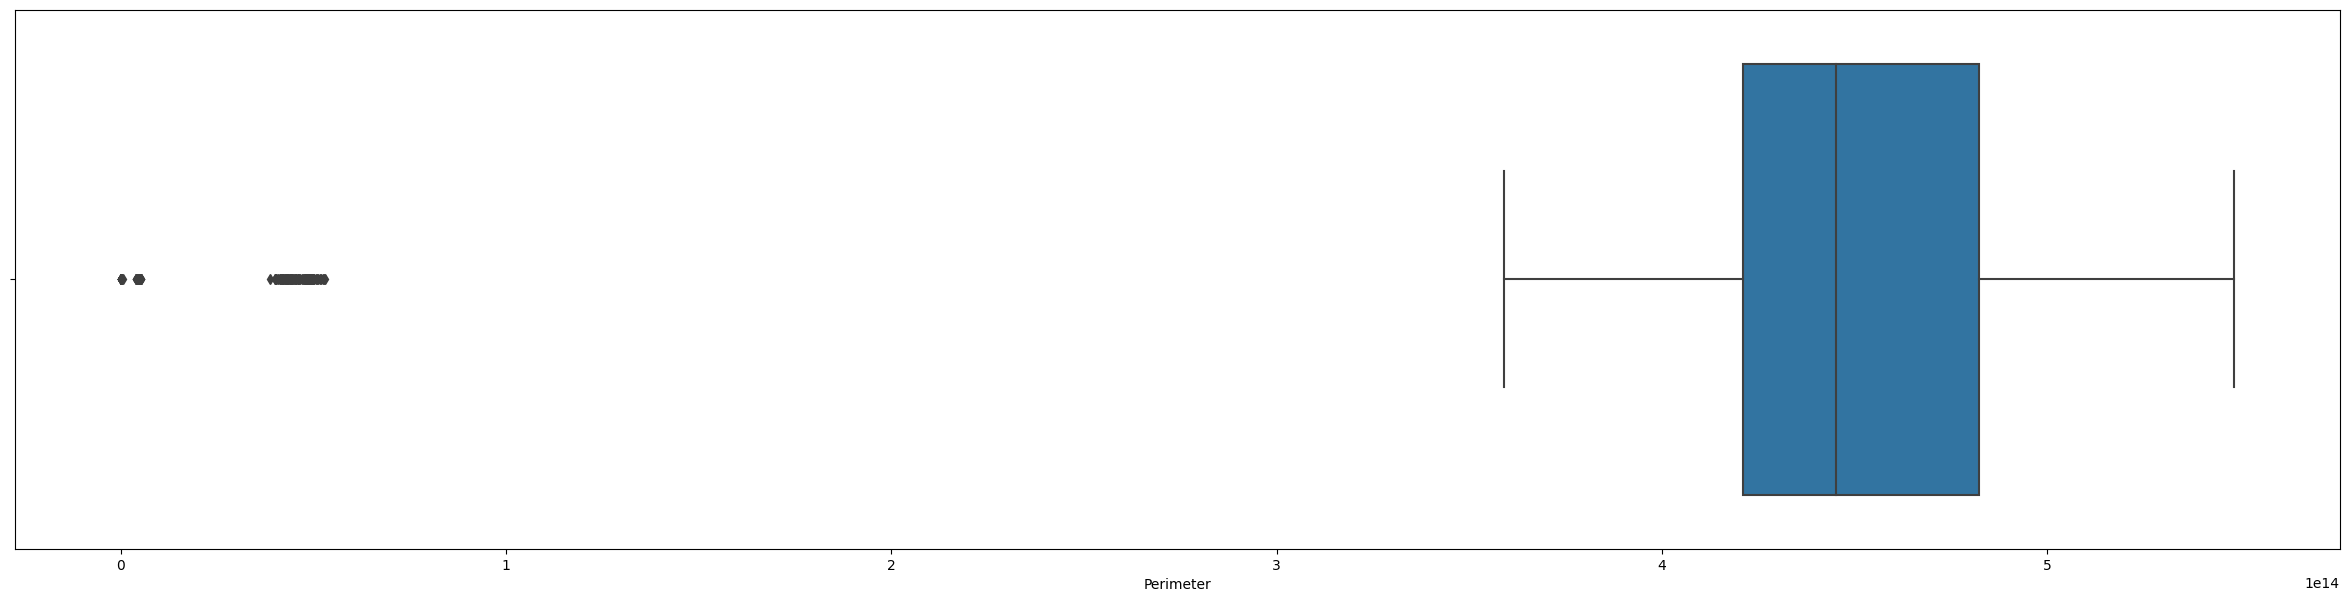

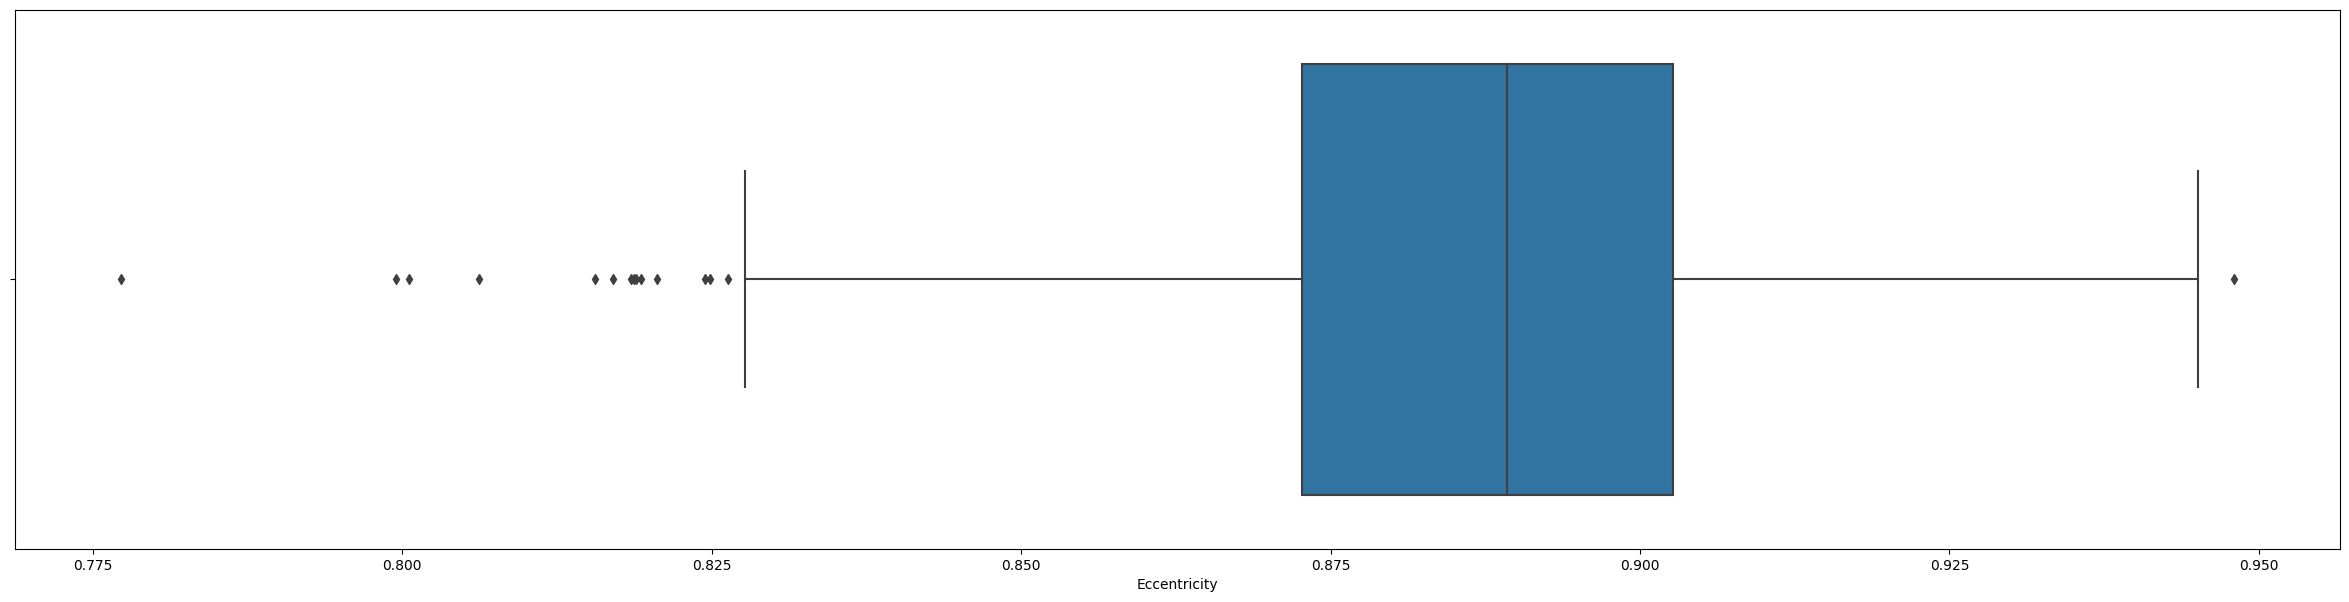

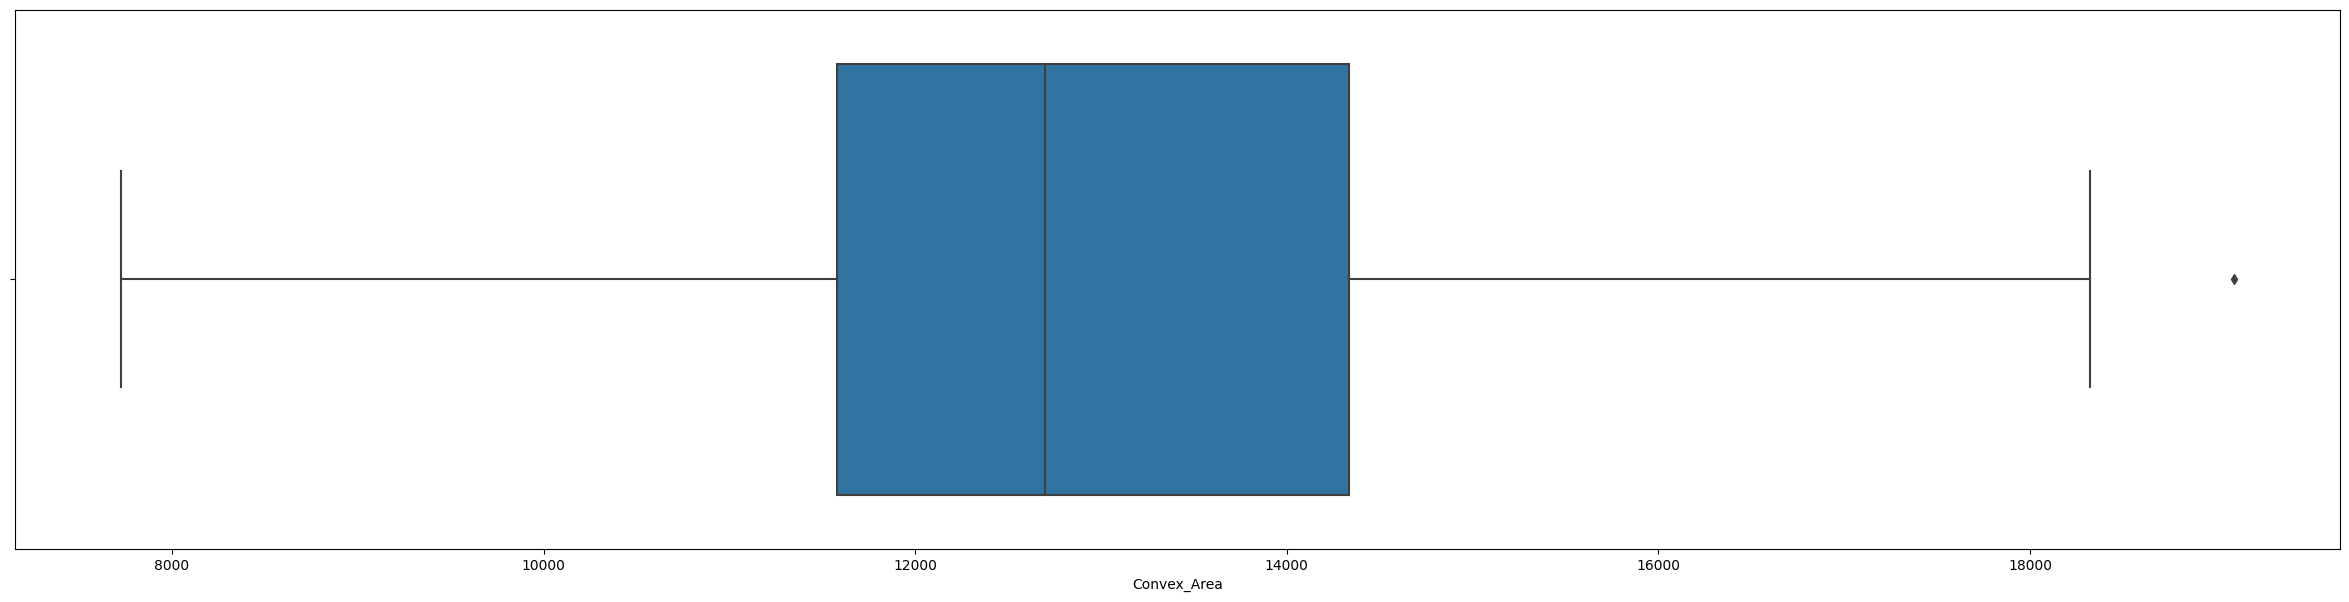

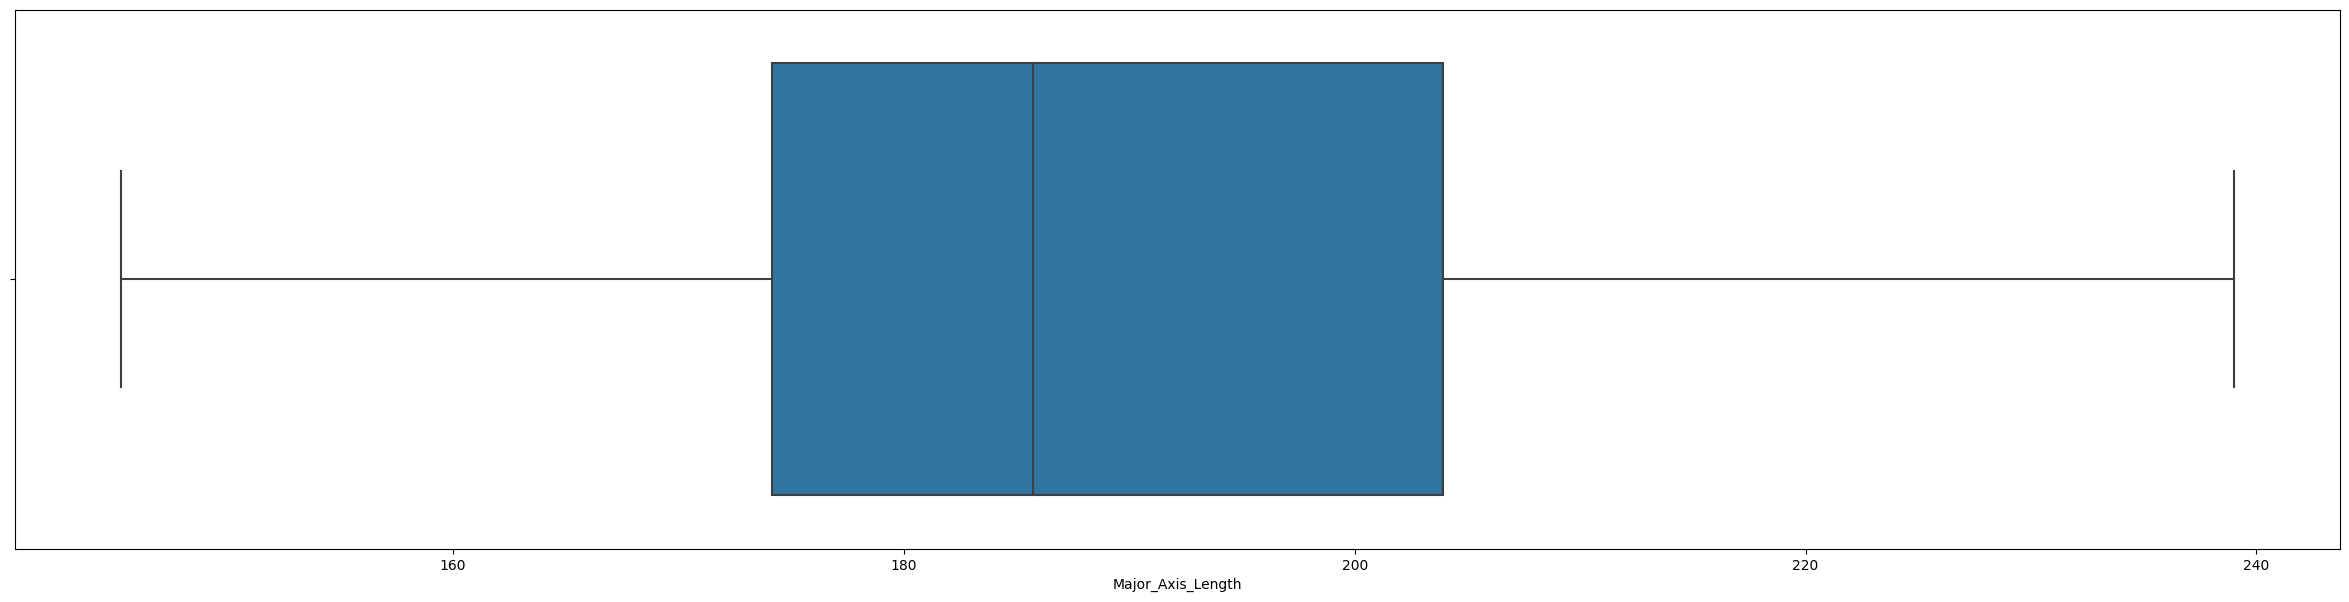

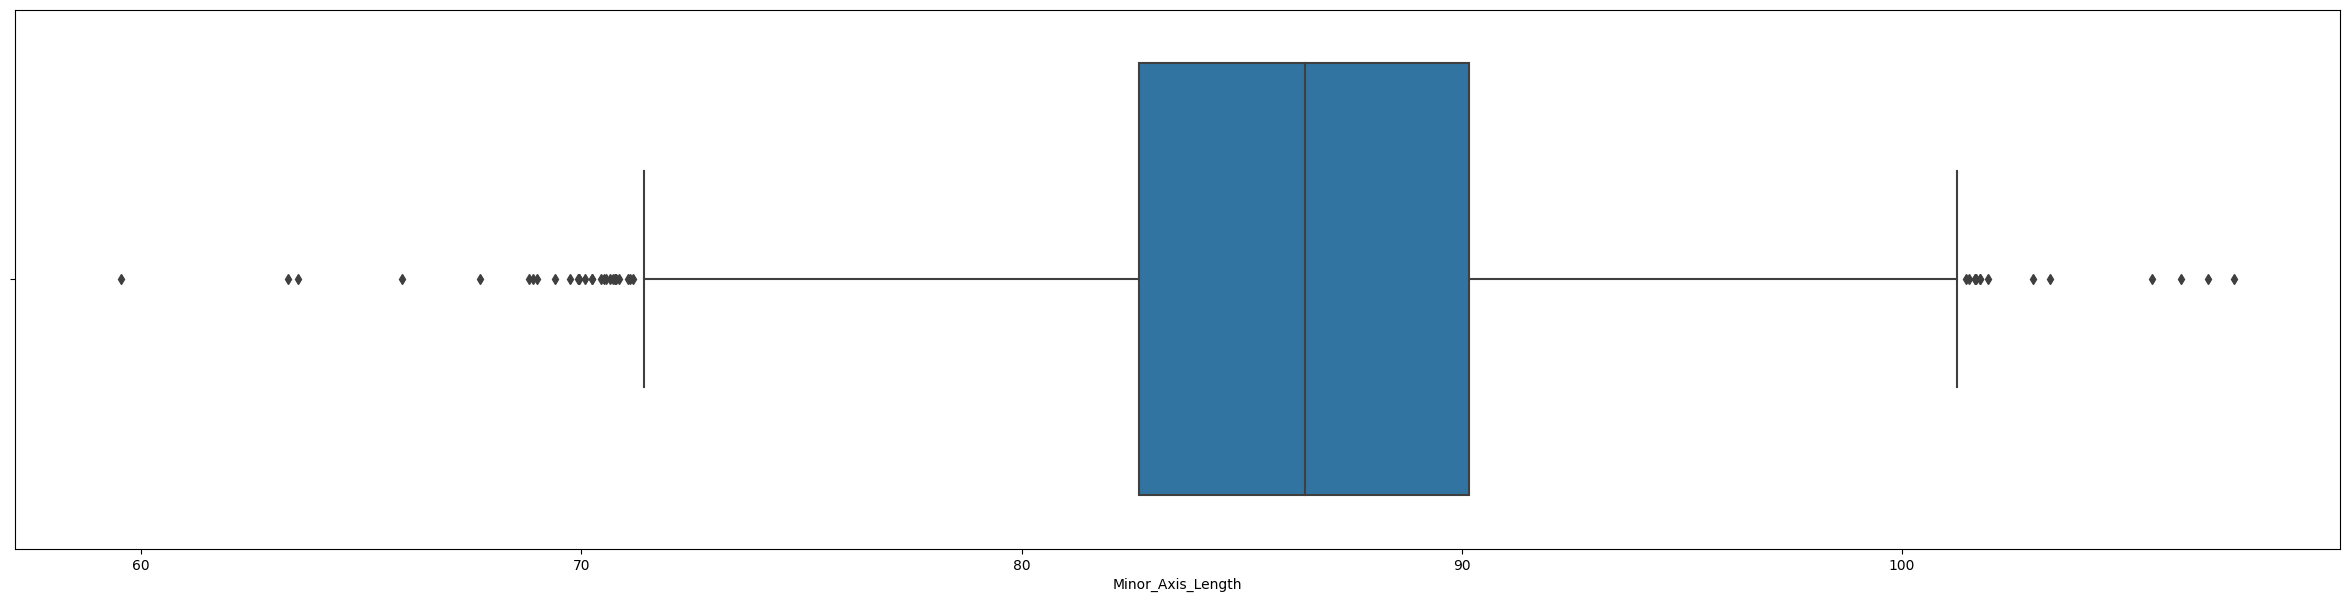

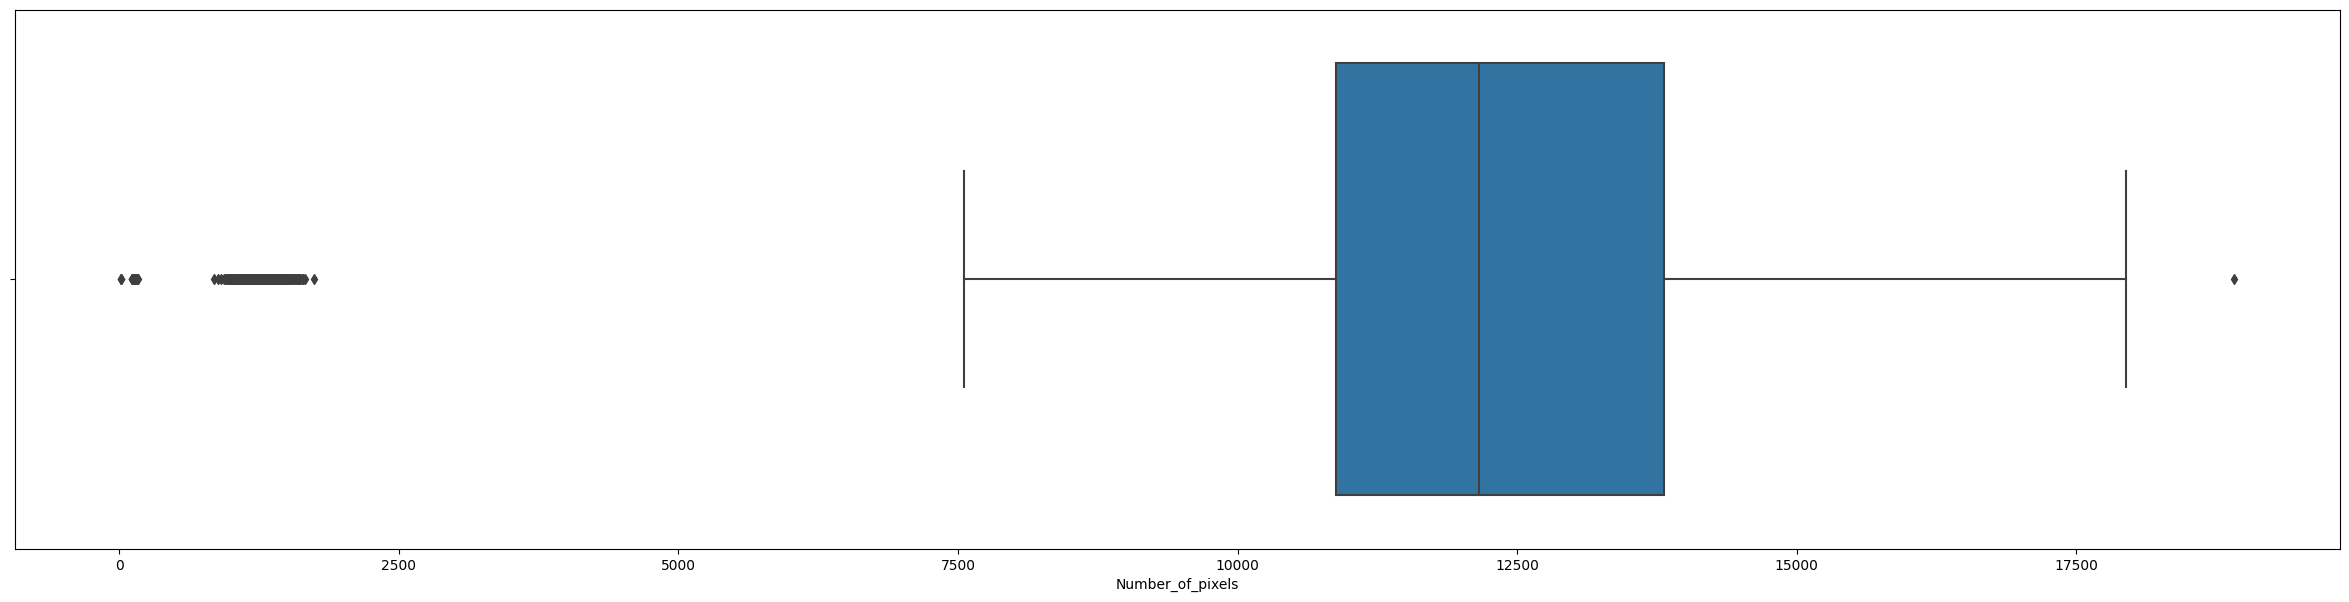

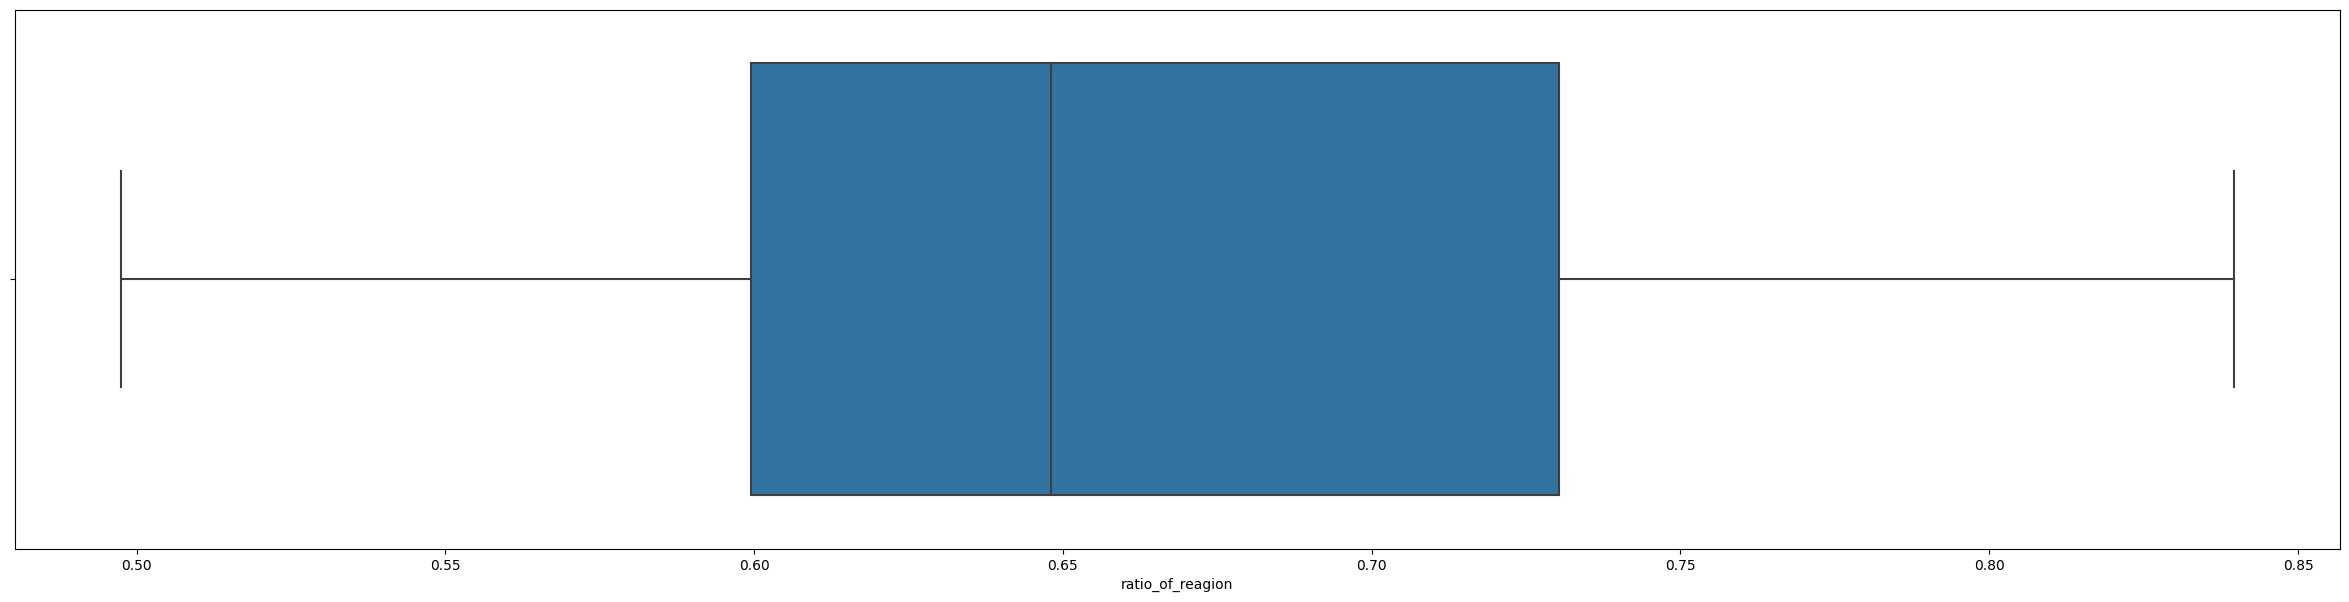

In [16]:
for i in df.columns:
    if i=="outcome":
        break
    plt.figure(figsize=(30,7))
    fig=sns.boxplot(df, x=i)
    plt.show()

In [8]:
(df==0).sum()

Perimeter               0
Eccentricity            0
Convex_Area             0
Major_Axis_Length       0
Minor_Axis_Length       0
Number_of_pixels        0
ratio_of_reagion        0
outcome              1164
dtype: int64

In [9]:
df.isna().sum()

Perimeter            0
Eccentricity         0
Convex_Area          0
Major_Axis_Length    0
Minor_Axis_Length    0
Number_of_pixels     0
ratio_of_reagion     0
outcome              0
dtype: int64

# Train test split

In [5]:
X=df.drop("outcome",1)
y=df["outcome"]

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,stratify=y)

### Scale the data

In [7]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# estimate logistic regression

In [137]:
params = {"C": [0.001, 0.005, 0.01, 0.04, 0.05, 0.1, 0.5, 1],
                "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [138]:
log = GridSearchCV(LogisticRegression(),
                                params,
                                cv=5,
                                verbose=0, n_jobs=-1)

In [139]:
log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.04, 0.05, 0.1, 0.5, 1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [140]:
log.best_params_

{'C': 0.5, 'solver': 'lbfgs'}

In [143]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [157]:
cross_val_score(LogisticRegression(C=0.5, solver="lbfgs"), X_sc,y, cv=5, scoring="accuracy").mean()

0.9343308608853468

In [148]:
y_pred=log.predict(X_test)

In [17]:
def perform(y_test, y_pred, log):
    print("--------------------------------------------------------------------")
    print(f"test score:{round(log.score(X_test, y_test),4)}")
    print(f"train score:{round(log.score(X_train, y_train),4)}")
    print("--------------------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------------------")
    
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True )
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

--------------------------------------------------------------------
test score:0.9318
train score:0.9366
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       291
           1       0.95      0.93      0.94       398

    accuracy                           0.93       689
   macro avg       0.93      0.93      0.93       689
weighted avg       0.93      0.93      0.93       689

--------------------------------------------------------------------


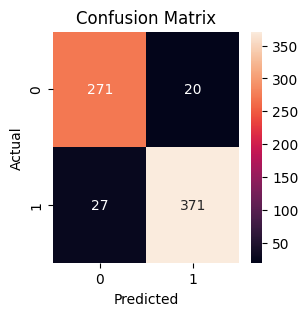

In [193]:
perform(y_test, y_pred)

# applied to test data

In [198]:
test=pd.read_csv("rice_test_data.csv")

In [199]:
test.drop("Unnamed: 0",1,inplace=True)

In [200]:
test

,Perimeter,Eccentricity,Convex_Area,Major_Axis_Length,Minor_Axis_Length,Number_of_pixels,ratio_of_reagion
0,4.482160e+14,0.910085,12103.0,191.746353,79.464005,11883,0.550317
1,4.248960e+13,0.876624,11499.0,173.943649,83.697662,11307,0.738633
2,4.215460e+14,0.855186,11622.0,168.256012,87.210754,11312,0.769210
3,4.123060e+14,0.861991,11017.0,165.551620,83.921928,10737,0.614104
4,4.285030e+14,0.892502,11676.0,180.488785,81.408310,11501,0.676529
...,...,...,...,...,...,...,...
788,4.337290e+13,0.884159,12036.0,180.278488,84.223511,11774,0.797696
789,4.495130e+14,0.880204,13072.0,186.661514,88.588745,12895,0.584754
790,4.063710e+14,0.867567,10655.0,163.894699,81.508217,10246,0.707108
791,4.399520e+14,0.858598,13005.0,179.201691,91.867722,12818,0.625818


In [201]:
(test==0).sum()

Perimeter            0
Eccentricity         0
Convex_Area          0
Major_Axis_Length    0
Minor_Axis_Length    0
Number_of_pixels     0
ratio_of_reagion     0
dtype: int64

In [202]:
test.isna().sum()

Perimeter            0
Eccentricity         0
Convex_Area          0
Major_Axis_Length    0
Minor_Axis_Length    0
Number_of_pixels     0
ratio_of_reagion     0
dtype: int64

In [203]:
sc=StandardScaler()
test=sc.fit_transform(test)

In [204]:
test_pred_log=log.predict(test)

In [205]:
test_pred_log

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [216]:
test_pred_log.tolist().count(1),test_pred_log.tolist().count(0)

(451, 342)

# estimate knn

In [8]:
test_score=[]
train_score=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [9]:
pd.DataFrame({"test":test_score, "train":train_score}, index=range(1,20))

,test,train
1,0.894049,1.000000
2,0.883890,0.949686
3,0.912917,0.954040
4,0.908563,0.944364
5,0.912917,0.941945
6,0.912917,0.942429
7,0.923077,0.941461
8,0.914369,0.939526
9,0.921626,0.938075
10,0.920174,0.938075


In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

In [11]:
knn.score(X_train, y_train)

0.9380745041122399

In [12]:
knn.score(X_test, y_test)

0.9201741654571843

In [13]:
y_pred=knn.predict(X_test)

--------------------------------------------------------------------
test score:0.9202
train score:0.9381
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       291
           1       0.93      0.93      0.93       398

    accuracy                           0.92       689
   macro avg       0.92      0.92      0.92       689
weighted avg       0.92      0.92      0.92       689

--------------------------------------------------------------------


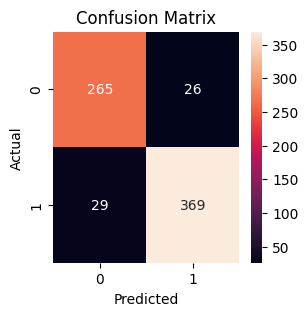

In [18]:
perform(y_test, y_pred,knn)

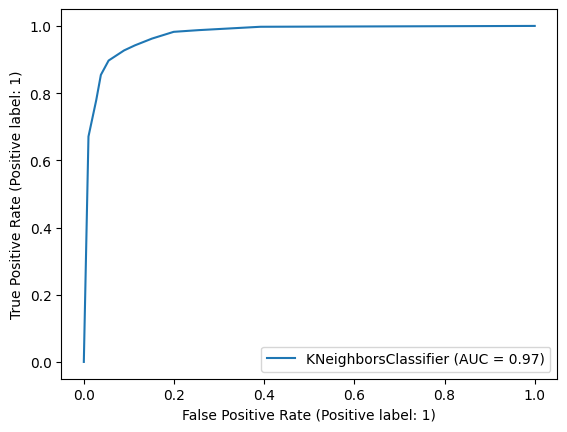

In [24]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(knn, X_test, y_test);

# Random Forest

In [31]:
param = {"n_estimators": [100, 500, 1000, 1500, 2000],
           "max_depth": [None, 3, 5,7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [32]:
rand_for=RandomizedSearchCV(RandomForestClassifier(),
                           param,
                           cv=5,
                           n_iter=50,
                           verbose=False)

In [ ]:
rand_for.fit(X_train, y_train)

In [34]:
rand_for.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [39]:
cross_val_score(RandomForestClassifier(n_estimators=100,min_samples_split=12,min_samples_leaf=13,max_depth=3),
               X,y,cv=5).mean()

0.931427707199032

In [40]:
rand=RandomForestClassifier(n_estimators=100,min_samples_split=12,min_samples_leaf=13,max_depth=3)

In [ ]:
rand.fit(X_train, y_train)

In [42]:
y_pred=rand.predict(X_test)

--------------------------------------------------------------------
test score:0.9289
train score:0.9395
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       291
           1       0.94      0.93      0.94       398

    accuracy                           0.93       689
   macro avg       0.93      0.93      0.93       689
weighted avg       0.93      0.93      0.93       689

--------------------------------------------------------------------


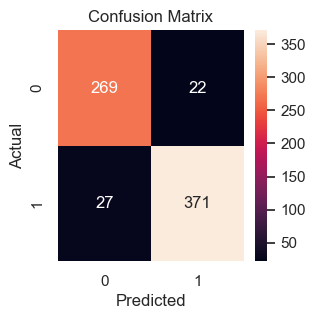

In [64]:
sns.set(font_scale=1)
perform(y_test, y_pred, rand)

In [47]:
param2 = {"n_estimators": [100,200,300,400,500],
           "max_depth": [3,4,5,6],
           "min_samples_split": np.arange(10, 16),
           "min_samples_leaf": np.arange(10, 16)}

In [48]:
grid_for=GridSearchCV(RandomForestClassifier(),
                     param2,
                     cv=5,
                     verbose=False,
                     n_jobs=-1)

In [ ]:
grid_for.fit(X_train, y_train)

In [51]:
grid_for.best_params_

{'max_depth': 3,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 100}

In [54]:
cross_val_score(RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=13,max_depth=3),
               X,y,cv=5).mean()

0.932515978852679